# OpenClassrooms - parcours Data Analyst Business Intelligence - P8

# Milestone 1 - Analyse des données

Dans cette partie nous allons analyser le jeu de données que nous avons à notre disposition. Notre objectif est de comprendre les relations entre les variables, et surtout, celles qui influent sur le prix des transactions immobilières. Grâce à ce travail, nous pourrons ne conserver que les variables qui seront utiles à l'apprentissage de notre algorithme.

## 1.Type des données

La première étape à réaliser est d'importer les données dans le notebook et d'opérer des transformations sur les variables si celles-ci s'imposent (exemple : nettoyage ou changement de type des variables, etc.).

In [2]:
import os
os.environ["OMP_NUM_THREADS"] = '1'

In [3]:
#On importe les librairies que nous utiliserons pour traiter les données et les visualiser
import pandas as pd, numpy as np
# N'oubliez pas d'avoir installé les librairies pandas, numpy et matplotlib via la commande pip

In [4]:
#On importe les données dans un dataframe
df_historique = pd.read_excel("historique_immobilier_paris_2017_2021.xlsx")
df_historique.head(5)

,date_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,code_postal,nom_commune,code_type_local,type_local,surface_reelle
0,2017-01-03,5.505597e+05,8,RUE DES COUTURES SAINT GERVAIS,75003,Paris 3e Arrondissement,2,Appartement,50
1,2017-01-12,1.576492e+06,32,AV MARCEAU,75008,Paris 8e Arrondissement,2,Appartement,163
2,2017-01-10,6.577574e+05,52,RUE DU FAUBOURG SAINT HONORE,75008,Paris 8e Arrondissement,2,Appartement,66
3,2017-01-10,2.500868e+05,64,RUE DU VERTBOIS,75003,Paris 3e Arrondissement,2,Appartement,22
4,2017-01-13,1.762667e+05,25,RUE DES LAVANDIERES STE OPPORT,75001,Paris 1er Arrondissement,2,Appartement,15


Attention, si l'opération ci-dessus ne marche pas, il se peut que le package "openpyxl" ne soit pas présent sur votre ordinateur. Si c'est le cas vous pouvez l'installer en éxécutant la commande : pip install openpyxl ou conda install openpyxl.

In [5]:
#On vérifie que le type des données attribué par pandas est cohérent
df_historique.dtypes

date_mutation       datetime64[ns]
valeur_fonciere            float64
adresse_numero               int64
adresse_nom_voie            object
code_postal                  int64
nom_commune                 object
code_type_local              int64
type_local                  object
surface_reelle               int64
dtype: object

### 2. Regardons les différents types de biens immobiliers que nous avons dans nos données :

In [6]:
print('la liste des différents types de biens immobiliers que nous avons dans les données est ?:')
df_historique[['code_type_local', 'type_local']].drop_duplicates()

la liste des différents types de biens immobiliers que nous avons dans les données est ?:


,code_type_local,type_local
0,2,Appartement
18,4,Local industriel. commercial ou assimilé


On observe donc qu'il y a 2 types de biens, dont les code 2 (Appartement) et 4 (Locaux)

### 3. Nombre de transactions

In [7]:
#On verifie le nombre de transactions que nous avons dans notre dataframe
nombre_total_transactions = len(df_historique)
print(f'Le nombre de transactions dans les données est : {nombre_total_transactions}')
nombre_transactions_appartements = len(df_historique[df_historique['code_type_local'] ==2])
print(f'Le nombre de transactions pour les appartements dans les données est : {nombre_transactions_appartements}')
nombre_transactions_locaux_commerciaux = len(df_historique[df_historique['code_type_local'] ==4])
print(f'Le nombre de transactions pour les locaux commerciaux dans les données est : {nombre_transactions_locaux_commerciaux}')

Le nombre de transactions dans les données est : 26196
Le nombre de transactions pour les appartements dans les données est : 24353
Le nombre de transactions pour les locaux commerciaux dans les données est : 1843


### 4. interval de l'historique des données

In [8]:
#On vérifie également la plage de l'historique disponible
premiere_date = df_historique['date_mutation'].min()
derniere_date = df_historique['date_mutation'].max()
print('Première date de transaction :', premiere_date)
print('Dernière date de transaction :', derniere_date)

Première date de transaction : 2017-01-02 00:00:00
Dernière date de transaction : 2021-12-31 00:00:00


## Commençons à analyser les données

Maintenant nous allons analyser les données historiques pour les 2 différents types de biens immobiliers en essayant d'identifier les relations entre les variables. Mais avant cela, il nous faudra pouvoir comparer les biens entre eux, et pour cela nous allons créer une colonne du prix au metre carré.

In [9]:
# Calcul de la colonne
df_historique['Prix_au_m2'] = df_historique['valeur_fonciere'] / df_historique['surface_reelle']

Maintenant, analysons les appartements.

### 5. Evolution du prix au metre carré des appartements dans Paris

In [10]:
#On retire les colonnes qui sont à priori inutiles ET nous allons nous concentrer sur les appartements dans un premier temps

colonnes_a_supprimer = ['adresse_numero', 'adresse_nom_voie', 'code_type_local', 'nom_commune']
df_appartement = df_historique.drop(columns=colonnes_a_supprimer)
appartement = df_historique['code_type_local'] == 2
df_appartement = df_appartement[appartement]
df_appartement.head(5)

,date_mutation,valeur_fonciere,code_postal,type_local,surface_reelle,Prix_au_m2
0,2017-01-03,5.505597e+05,75003,Appartement,50,11011.193562
1,2017-01-12,1.576492e+06,75008,Appartement,163,9671.732877
2,2017-01-10,6.577574e+05,75008,Appartement,66,9966.020548
3,2017-01-10,2.500868e+05,75003,Appartement,22,11367.582877
4,2017-01-13,1.762667e+05,75001,Appartement,15,11751.113836


In [11]:
#Préparons un dataframe en regroupant les prix moyens de ventes des appartements par année avec la surface moyenne associée

colonnes_selectionnees = ['date_mutation', 'Prix_au_m2']
df_appartement_2 = df_appartement[colonnes_selectionnees].copy()
df_appartement_2['Annee'] = df_appartement_2['date_mutation'].dt.year
df_appartement_2 = df_appartement_2.groupby('Annee')['Prix_au_m2'].mean().reset_index()

df_appartement_2.head()

,Annee,Prix_au_m2
0,2017,9492.859195
1,2018,10031.403432
2,2019,10562.712581
3,2020,10674.872650
4,2021,10455.600126


On constate sur la moyenne des prix de vente des appartements à Paris que l'augmentation est croissante, avec une légère baisse sur 2021.

Nous allons créer un graphique pour mieux le visualiser.

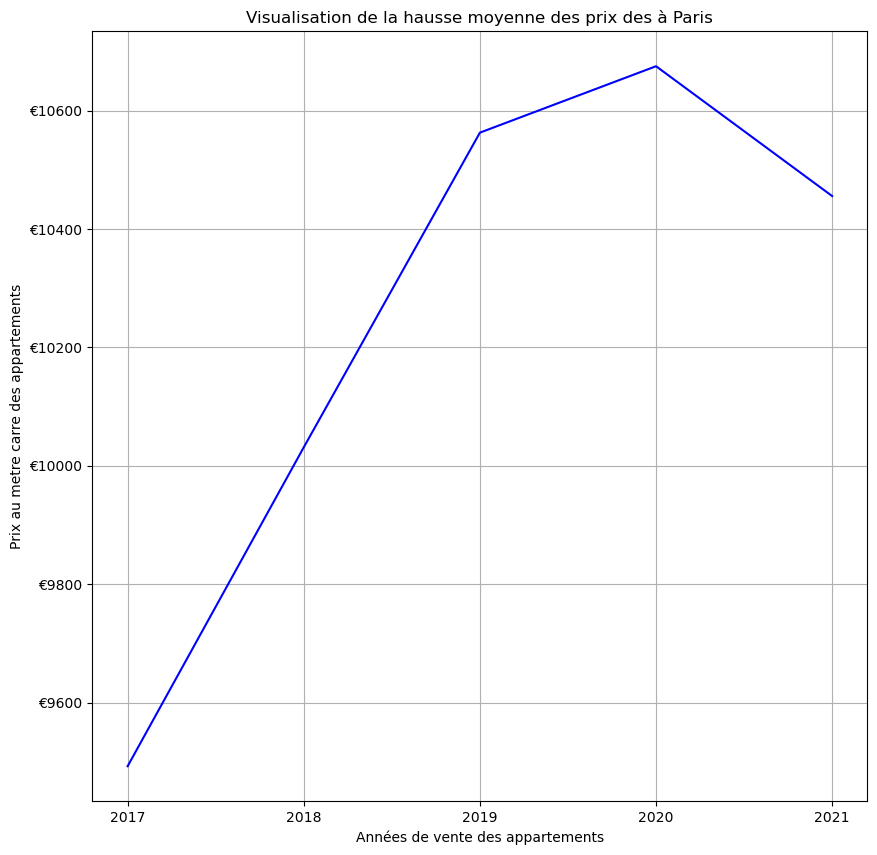

In [12]:
#Création d'un graphique pour visualiser la hausse de la moyenne des prix
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plt.figure(figsize=(10,10))
plt.plot(['2017','2018','2019','2020','2021'],df_appartement_2['Prix_au_m2'],color='blue')
plt.xlabel('Années de vente des appartements')
plt.ylabel('Prix au metre carre des appartements')
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()
plt.title('Visualisation de la hausse moyenne des prix des à Paris')
plt.show()

### 6. Différences de prix au metre carré entre les arrondissements

Maintenant nous allons chercher à afficher l'évolution des prix par arrondissement. Vérifions la liste des arrondissements que nous avons dans nos données. Normalement à Paris nous avons 20 codes postaux différents, 1 par arrondissement allant de 75001 à 75020.

In [13]:
#Liste des codes postaux dans nos données.
codes_postaux = sorted(df_historique['code_postal'].unique())
print(codes_postaux)

[75001, 75002, 75003, 75004, 75005, 75006, 75007, 75008, 75009, 75010, 75011, 75012, 75013, 75014, 75015, 75016, 75017, 75018, 75019, 75020]


In [14]:
#Créeons un dataframe pour une deuxième visualisation avec l'evolution des prix par arrondissement

colonnes_selectionnees = ['date_mutation', 'Prix_au_m2', 'code_postal']
df_appartement_3 = df_appartement[colonnes_selectionnees].copy()
df_appartement_3['Annee'] = df_appartement_3['date_mutation'].dt.year
df_appartement_3 = df_appartement_3.groupby(['Annee', 'code_postal'])['Prix_au_m2'].mean().reset_index()

df_appartement_3

,Annee,code_postal,Prix_au_m2
0,2017,75001,11762.706289
1,2017,75002,10920.126562
2,2017,75003,11679.818729
3,2017,75004,12407.227522
4,2017,75005,11306.752404
...,...,...,...
95,2021,75016,10790.307817
96,2021,75017,10372.368746
97,2021,75018,9665.640629
98,2021,75019,8828.586057


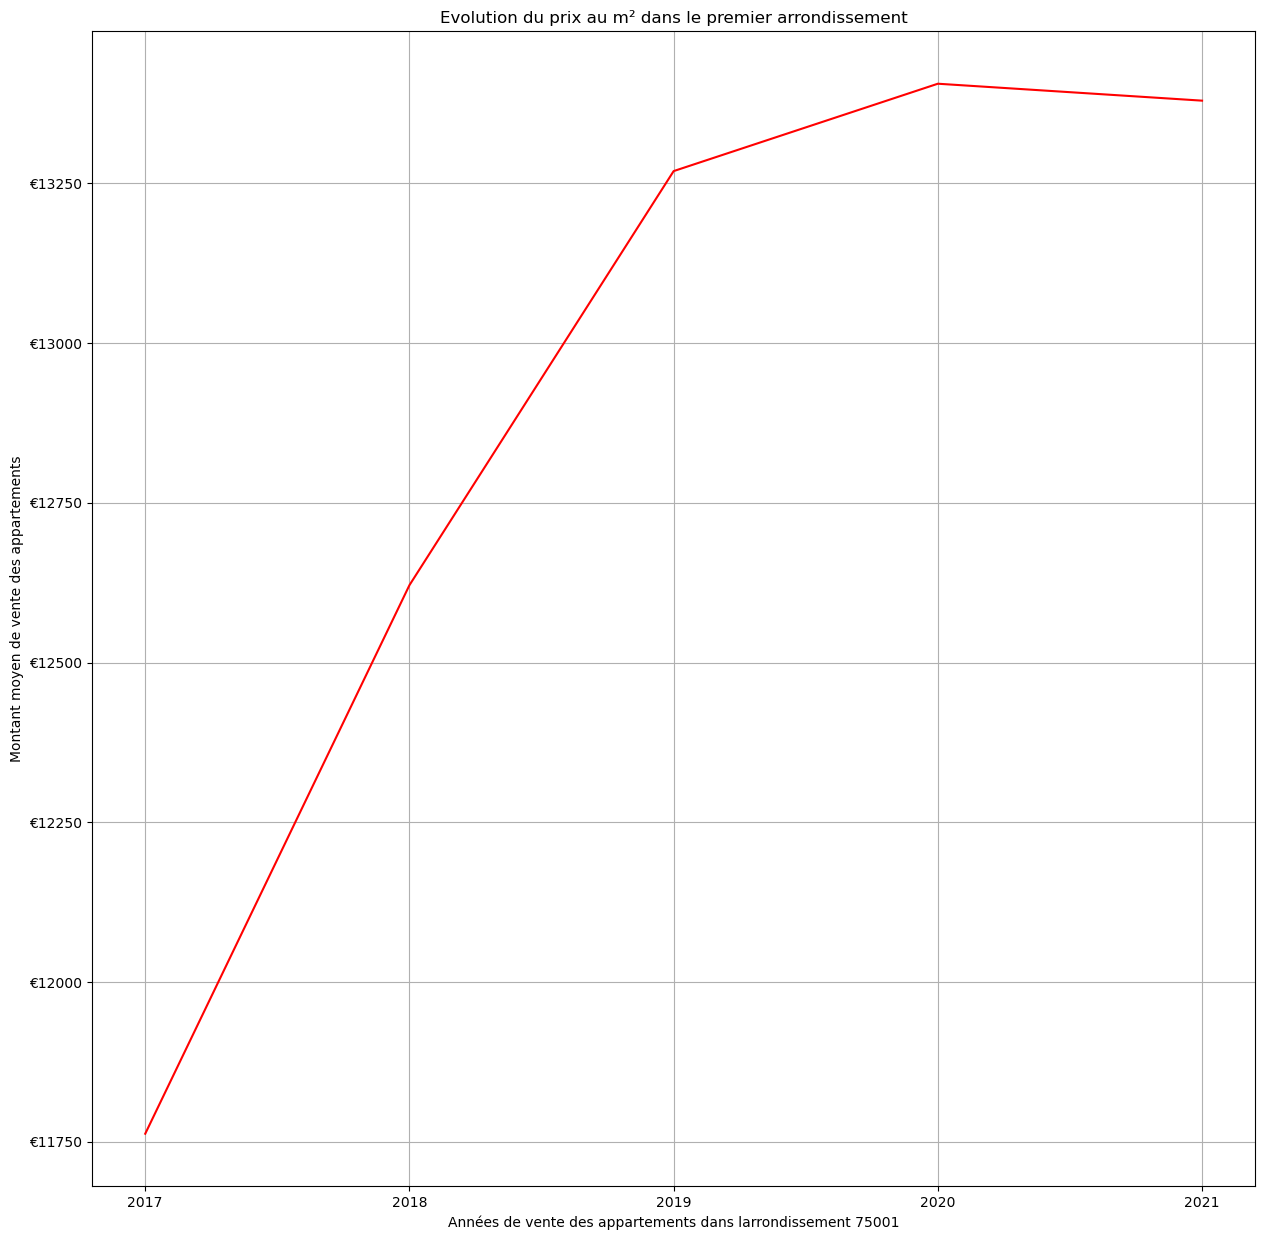

In [15]:
#Création d'un graphique pour visualiser la hausse de la moyenne des prix au metre carré dans le premier arrondissement
plt.figure(figsize=(15,15))
df_75001 = df_appartement_3[df_appartement_3['code_postal'] == 75001]
plt.plot(['2017','2018','2019','2020','2021'], df_75001['Prix_au_m2'], color='red')
plt.xlabel('Années de vente des appartements dans larrondissement 75001')
plt.ylabel('Montant moyen de vente des appartements')
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()
plt.title('Evolution du prix au m² dans le premier arrondissement')
plt.show()

Nous allons ajouter à cette visualisation tous les autres arrondissement avec une couleur différente.

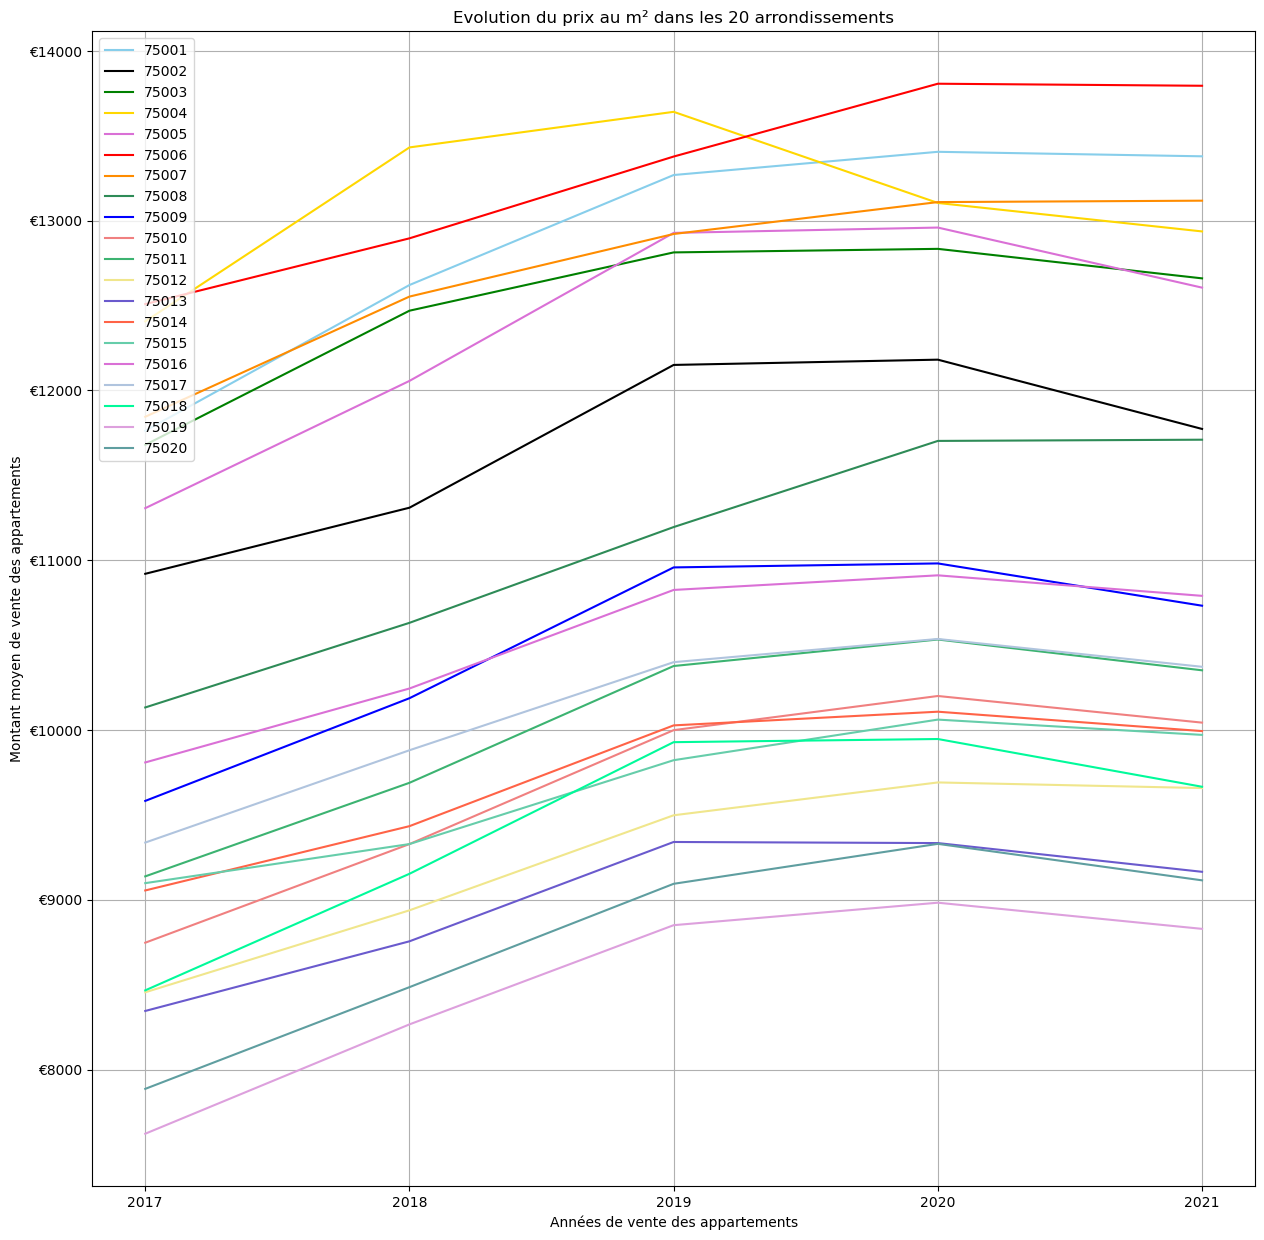

In [16]:
#On affiche l'évolution du prix au m² par arrondissement dans Paris
plt.figure(figsize=(15,15))
interval_historique=['2017','2018','2019','2020','2021']
#Insérer les lignes à tracer ci-dessous
couleurs_arrondissements = ['skyblue', 'black', 'green', 'gold', 'orchid', 'red', 'darkorange', 'seagreen', 'blue', 'lightcoral', 'mediumseagreen', 'khaki', 'slateblue', 'tomato', 'mediumaquamarine', 'orchid', 'lightsteelblue', 'mediumspringgreen', 'plum', 'cadetblue']
codes_postaux = sorted(df_appartement_3['code_postal'].unique())
for code_postal, couleur in zip(codes_postaux, couleurs_arrondissements):
    plt.plot(interval_historique, df_appartement_3.loc[df_appartement_3['code_postal'] == code_postal]['Prix_au_m2'], color=couleur, label=f'{code_postal}')
plt.xlabel('Années de vente des appartements')
plt.ylabel('Montant moyen de vente des appartements')
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()
plt.title('Evolution du prix au m² dans les 20 arrondissements')
plt.legend(loc='upper left')
plt.show()

On observe que globalement l'évolution des prix est similaire dans tous les arrondissements de paris.

### 7. Prix au metre carré par transaction dans un arrondissement

In [17]:
#Vérifions le nombre de transaction dans le 6ème car le prix semble élevé

transactions_6e = df_appartement[df_appartement['code_postal'] == 75006]
nombre_transactions_6e = transactions_6e.shape[0]
print(f'Le nombre de transactions dans le 6e arrondissement est : {nombre_transactions_6e}')

Le nombre de transactions dans le 6e arrondissement est : 709


On constate que le nombre de transactions n'est pas illogique.

Affichons l'historique des transactions pour visualiser la dispersion des données :

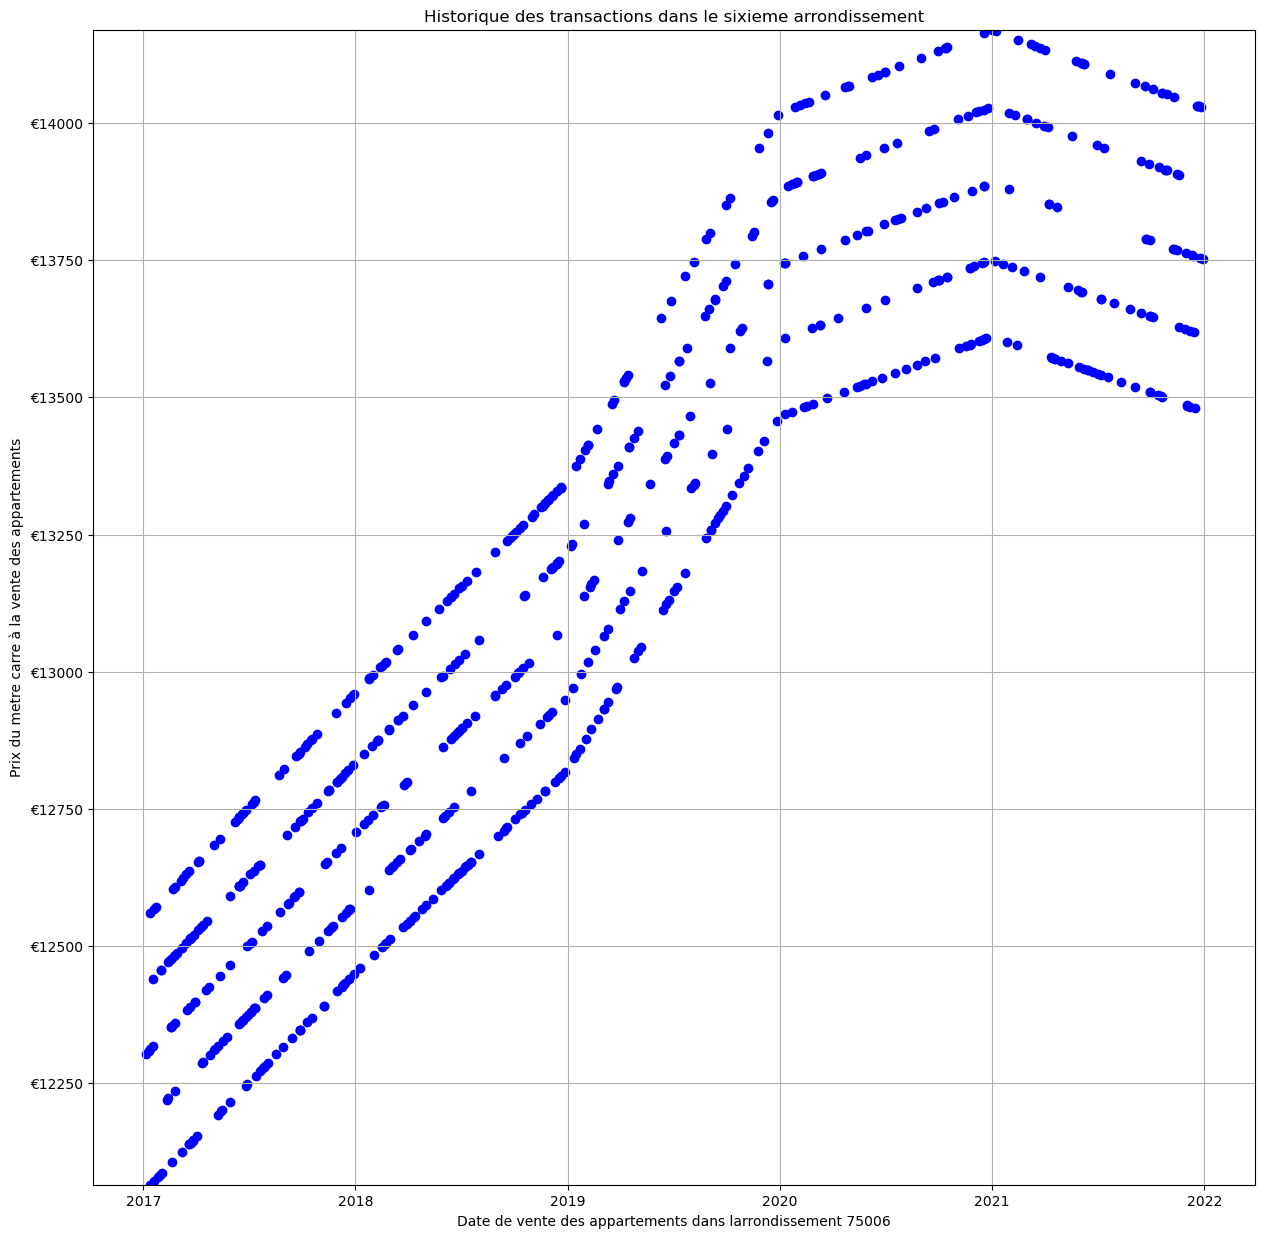

In [18]:
plt.figure(figsize=(15,15))
#Insérer ci-dessous le scatter plot
plt.scatter(transactions_6e['date_mutation'], transactions_6e['Prix_au_m2'], color='blue')
plt.xlabel('Date de vente des appartements dans larrondissement 75006')
plt.ylabel('Prix du metre carre à la vente des appartements')
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.ylim(transactions_6e['Prix_au_m2'].min(), transactions_6e['Prix_au_m2'].max())
plt.grid(which='both')
plt.title('Historique des transactions dans le sixieme arrondissement')
plt.show()

On observe que toutes les transactions se situent bien sur les courbes, il'n'y a donc pas d'outliers.

Pour nous rassurer sur la relation entre les données nous allons utiliser un test statistique de corrélation.

### 8. Vérification de la relation entre le prix au m² et la date dans le 6ème arrondissement par le calcul du coefficient de corrélation de Spearman.

Pour cette distribution nous allons calculer le coefficient de corrélation de Spearman. La relation entre le prix au metre carré et la date n'est pas forcément linéaire mais elle s'en rapproche suffisamment pour que cette analyse soit pertinente (voir l'évolution du prix au metre carré globale montrée plus haut, on a presque une droite sauf entre 2020 et 2021). Ce qui nous interesse c'est de prouver que le temps a une influence sur le prix.

In [19]:
#On calcule la corrélation de Spearman
from scipy.stats import spearmanr

df_appartement['date_mutation'] = pd.to_datetime(df_appartement['date_mutation'])
df_appartement['timestamp'] = df_appartement['date_mutation'].astype('int64') / (10**9)
correlation, p_value = spearmanr(df_appartement.loc[df_appartement['code_postal']==75006]['Prix_au_m2'], df_appartement.loc[df_appartement['code_postal']==75006]['timestamp'])
print(f"Le coefficient de corrélation est de : {correlation}")
print(f"La p-value est : {p_value}")

Le coefficient de corrélation est de : 0.9148449773186671
La p-value est : 1.1999820574651415e-280


Le coefficient de corrélation est de 0.9 avec une pvalue de 0 donc nous pouvons confirmer la corrélation.

### 9. Vérification de la relation entre la valeur fonciere et la surface

In [20]:
correlation, p_value = spearmanr(df_appartement.loc[df_appartement['code_postal']==75006]['surface_reelle'], df_appartement.loc[df_appartement['code_postal']==75006]['valeur_fonciere'])
print(f"Le coefficient de corrélation est de : {correlation}")
print(f"La p-value est : {p_value}")

Le coefficient de corrélation est de : 0.9977685406899677
La p-value est : 0.0


Le coefficient de corrélation est de 1 avec une pvalue de 0. La relation est donc confirmée.

Regardons maintenant si le type de bien à une influence sur le prix au metre carré également.

### 10. Analyse des locaux industriels, commerciaux et assimilés 

In [21]:
#On crée un dataset qui ne contient que les locaux commerciaux

colonnes_a_supprimer = ['adresse_numero', 'adresse_nom_voie', 'code_type_local', 'nom_commune']
df_locaux = df_historique.drop(columns=colonnes_a_supprimer)
locaux = df_historique['code_type_local'] == 4
df_locaux = df_locaux[locaux]
df_locaux.head(5)

,date_mutation,valeur_fonciere,code_postal,type_local,surface_reelle,Prix_au_m2
18,2017-02-01,3.113277e+06,75003,Local industriel. commercial ou assimilé,250,12453.109192
29,2017-02-17,1.164375e+06,75003,Local industriel. commercial ou assimilé,95,12256.581685
34,2017-02-20,3.802522e+05,75003,Local industriel. commercial ou assimilé,31,12266.199603
91,2017-03-09,3.623842e+05,75001,Local industriel. commercial ou assimilé,29,12496.006027
109,2017-03-29,3.159072e+05,75003,Local industriel. commercial ou assimilé,25,12636.289027


In [22]:
#Préparons un dataframe en regroupant les prix au metre carré moyens des ventes par année

colonnes_selectionnees = ['date_mutation', 'Prix_au_m2']
df_locaux_2 = df_locaux[colonnes_selectionnees].copy()
df_locaux_2['Annee'] = df_locaux_2['date_mutation'].dt.year
df_locaux_2 = df_locaux_2.groupby('Annee')['Prix_au_m2'].mean().reset_index()
df_locaux_2.head(5)

,Annee,Prix_au_m2
0,2017,10949.909217
1,2018,11569.499180
2,2019,11960.132050
3,2020,11966.470204
4,2021,12006.488691


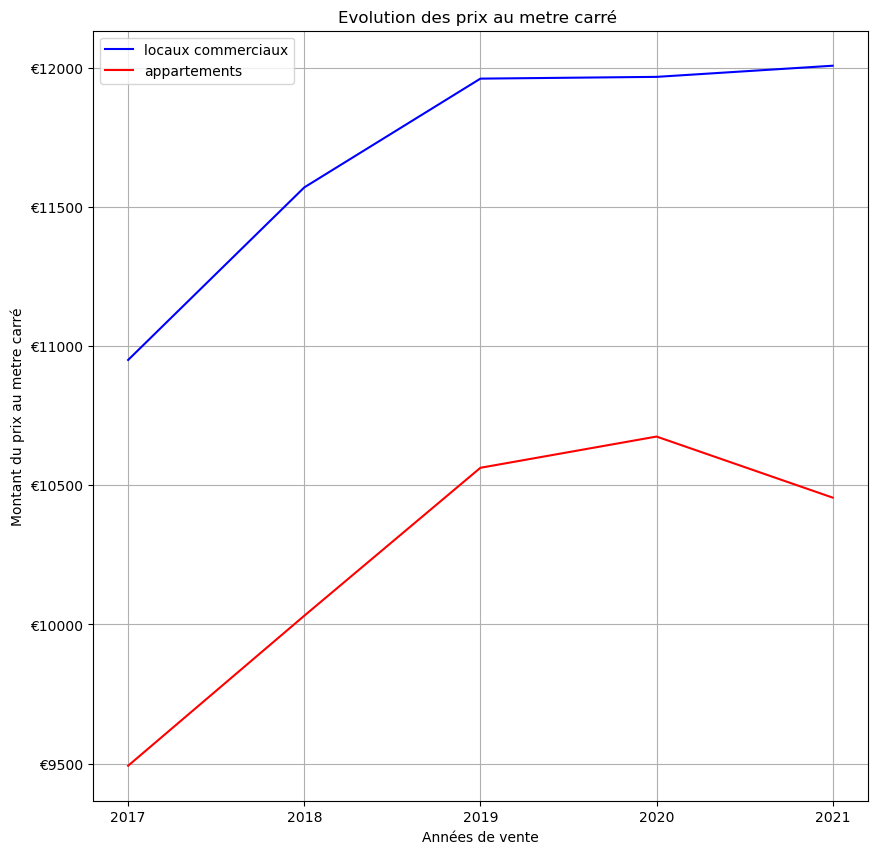

In [23]:
#Création d'un graphique pour visualiser la hausse de la moyenne des prix
plt.figure(figsize=(10,10))
plt.plot(['2017','2018','2019','2020','2021'],df_locaux_2['Prix_au_m2'],label='locaux commerciaux',color='blue')
plt.plot(['2017','2018','2019','2020','2021'],df_appartement_2['Prix_au_m2'],label='appartements',color='red')
plt.xlabel('Années de vente')
plt.ylabel('Montant du prix au metre carré')
plt.legend()
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()
plt.title('Evolution des prix au metre carré ')
plt.show()

Le prix au metre carré des locaux commerciaux est supérieur à celui des appartements

Après ces analyses, nous pouvons conclure que les dimensions à utiliser pour prédire le prix au m² sont : 
- la surface du bien immobilier,
- la date considérée, 
- la localisation (code_postal), 
- le type de bien.

# Milestone 2 - Entraînement de l'algorithme

Dans cette section nous allons maintenant entrâiner un algorithme à prédire la valeur fonciere d'un bien immobilier. Pour cela nous allons utiliser l'algorithme de régression linéaire.

On commence par préparer nos données en transformant les colonnes catégoriques du code postal et du type de local grâce au one hot encoder (sklearn) / get_dummies (pandas)

In [24]:
df_selected = df_historique[['code_postal', 'type_local', 'date_mutation', 'surface_reelle', 'valeur_fonciere']]
df_encoded = pd.get_dummies(df_selected, columns=['code_postal', 'type_local'])
df_encoded['timestamp'] = df_encoded['date_mutation'].astype('datetime64[s]').astype('int64') / 10**9
df_encoded.drop('date_mutation', axis=1, inplace=True)
df_encoded.head()

,surface_reelle,valeur_fonciere,code_postal_75001,code_postal_75002,code_postal_75003,code_postal_75004,code_postal_75005,code_postal_75006,code_postal_75007,code_postal_75008,...,code_postal_75014,code_postal_75015,code_postal_75016,code_postal_75017,code_postal_75018,code_postal_75019,code_postal_75020,type_local_Appartement,type_local_Local industriel. commercial ou assimilé,timestamp
0,50,5.505597e+05,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1.483402e+09
1,163,1.576492e+06,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1.484179e+09
2,66,6.577574e+05,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1.484006e+09
3,22,2.500868e+05,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1.484006e+09
4,15,1.762667e+05,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1.484266e+09


On utilise le train_test_split pour prélever un tiers de nos données (33%) et les garder de côté. Nous allons entraîner notre algorithme sur le reste des données et puis mesurer notre erreur moyenne en pourcentage de la valeur foncière

In [25]:
# On importe le train test split de la librairie sk_learn
from sklearn.model_selection import train_test_split
# La valeur y à trouver est la valeur foncière
X = df_encoded[['surface_reelle', 'code_postal_75001', 'code_postal_75002', 'code_postal_75003', 'code_postal_75004',
                'code_postal_75005', 'code_postal_75006', 'code_postal_75007', 'code_postal_75008', 'code_postal_75009',
                'code_postal_75010', 'code_postal_75011', 'code_postal_75012', 'code_postal_75013', 'code_postal_75014',
                'code_postal_75015', 'code_postal_75016', 'code_postal_75017', 'code_postal_75018', 'code_postal_75019',
                'code_postal_75020', 'type_local_Appartement', 'type_local_Local industriel. commercial ou assimilé',
                'timestamp']]
y = df_encoded['valeur_fonciere']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=6)

In [26]:
#conversion des données en str
df_encoded = df_encoded.astype(str)

In [27]:
#On entraîne l'algorithme ci-dessous et on effectue la prédiction
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error


model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
relative_error = (mae / y_test.mean()) * 100

print(f'Erreur relative moyenne en pourcentage : {relative_error:.2f}%')

Erreur relative moyenne en pourcentage : 6.84%


Notre algorithme fait donc 6.84 % d'erreur en moyenne sur la prédiction de la valeur foncière.

# Milestone 3 - Prédiction définitive pour le client 

Nous avons récupéré le fichier avec le portefeuille des actifs de la société. Nous allons l'importer puis effectuer la prédiction et statuer sur la branche qui, selon notre prédiction, aura le plus de valeur à la date demandée c'est à dire au 31 décembre 2022.<br>
Petite précision, nous souhaitons continuer à utiliser la surface réelle pour faire les calculs et pas la surface carrez. 

In [28]:
#On importe les données dans un dataframe
df_portefeuille=pd.read_excel('portefeuille_actifs.xlsx')
df_portefeuille.head()

,adresse_numero,adresse_nom_voie,code_postal,code_commune,nom_commune,surface_carrez,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,longitude,latitude
0,127,RUE SAINT-DENIS,75001,75101,Paris 1er Arrondissement,16.41,2,Appartement,25,1,2.349593,48.863227
1,62,RUE NOTRE-DAME DE NAZARETH,75003,75103,Paris 3e Arrondissement,20.47,2,Appartement,22,1,2.356977,48.867907
2,62,RUE DE TURENNE,75003,75103,Paris 3e Arrondissement,64.48,2,Appartement,65,3,2.364855,48.859318
3,32,AV GEORGE V,75008,75108,Paris 8e Arrondissement,63.29,2,Appartement,74,2,2.301586,48.868893
4,152,BD HAUSSMANN,75008,75108,Paris 8e Arrondissement,20.58,2,Appartement,22,1,2.311643,48.875490


Nous avons la liste des biens immobiliers de l'entreprise. Pour effectuer une prédiction, nous devons mettre ce fichier au même format que le dataframe que nous avons utilisé lors de l'entraînement de l'algorithme.

In [29]:
#On réutilise les mêmes fonctions pour faire le one hot encoding des variables catégorielles
import pandas as pd
import datetime as dt

df_selected = df_portefeuille[['code_postal', 'type_local', 'surface_reelle_bati']]
portefeuille_encoding = pd.get_dummies(df_selected, columns=['code_postal', 'type_local'])
portefeuille_encoding['timestamp'] = int(dt.datetime(2022, 12, 31).timestamp())
portefeuille_encoding.rename(columns={'surface_reelle_bati': 'surface_reelle'}, inplace=True)

portefeuille_encoding.head(5)

,surface_reelle,code_postal_75001,code_postal_75002,code_postal_75003,code_postal_75004,code_postal_75005,code_postal_75006,code_postal_75007,code_postal_75008,code_postal_75009,...,code_postal_75014,code_postal_75015,code_postal_75016,code_postal_75017,code_postal_75018,code_postal_75019,code_postal_75020,type_local_Appartement,type_local_Local industriel. commercial ou assimilé,timestamp
0,25,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1672441200
1,22,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1672441200
2,65,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1672441200
3,74,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1672441200
4,22,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1672441200


In [30]:
#Conversion du dataframe en str
portefeuille_encoding = portefeuille_encoding.astype(str)

Notre dataframe est prêt à être utilisé par notre algorithme de prédiction.

In [31]:
#On effectue la prédiction
y_pred_portefeuille = model.predict(portefeuille_encoding)
#On vérifie les 10 premières valeurs
print("Les 10 premières valeurs prédites pour le portefeuille:")
print(y_pred_portefeuille[:10])

Les 10 premières valeurs prédites pour le portefeuille:
[433566.27550952 372407.32378769 820216.9189967  884291.18187458
 342753.99697068 478138.29319665 393235.67705323 640194.50002583
 149119.80253424 147766.85803628]


Maintenant nous allons comparer la valorisation prédite pour les deux segments.

In [32]:
# Ajouter une colonne "prediction" avec les valeurs prédites
portefeuille_encoding['prediction'] = y_pred_portefeuille

(portefeuille_encoding.head(10))

,surface_reelle,code_postal_75001,code_postal_75002,code_postal_75003,code_postal_75004,code_postal_75005,code_postal_75006,code_postal_75007,code_postal_75008,code_postal_75009,...,code_postal_75015,code_postal_75016,code_postal_75017,code_postal_75018,code_postal_75019,code_postal_75020,type_local_Appartement,type_local_Local industriel. commercial ou assimilé,timestamp,prediction
0,25,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1672441200,433566.275510
1,22,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1672441200,372407.323788
2,65,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1672441200,820216.918997
3,74,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1672441200,884291.181875
4,22,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1672441200,342753.996971
5,35,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1672441200,478138.293197
6,24,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1672441200,393235.677053
7,60,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1672441200,640194.500026
8,11,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1672441200,149119.802534
9,13,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1672441200,147766.858036


In [33]:
#Valorisation du portefeuille sur le segment des particuliers
print('la valorisation du segment particulier est (en millions deuros):')


la valorisation du segment particulier est (en millions deuros):


In [34]:
# Somme des valeurs prédites pour les appartements
valeur_totale_appartements = portefeuille_encoding.loc[portefeuille_encoding['type_local_Appartement'] == '1', 'prediction'].sum()
print(f"La valeur totale des appartements prédite est : {valeur_totale_appartements.sum()/1000000}")

La valeur totale des appartements prédite est : 71.236905333062


In [35]:
#Valorisation du portefeuille sur le segment corporate
valeur_totale_appartements = portefeuille_encoding.loc[portefeuille_encoding['type_local_Local industriel. commercial ou assimilé'] == '1', 'prediction'].sum()
print(f"La valeur totale des appartements prédite est : {valeur_totale_appartements.sum()/1000000}")

La valeur totale des appartements prédite est : 98.3189282031813


Mes conclusions sur le segment avec la plus grande valorisation et sur les limites de cette estimation :
- Le segmment des Locaux aura donc la plus grande valeur 
- Cependant, les résultats de notre estimation ne prends pas compte des possibles éléments perturbateurs du marché Parisien (Crise de l'immobilier, épidémie, guerre, etc)

# Milestone 4 - Classification des données issues du jeu de test

Dans cette partie nous allons labelliser automatiquement les biens immobiliers comme étant :
- soit des Appartements
- soit des Local industriel. commercial ou assimilé
Pour cela nous allons utiliser l'algorithme du KMeans sur le jeu de données partagé par l'entreprise.

Pour que l'algorithme fonctionne, il faut que nous préparions les données en supprimant les dimensions inutiles et en nous concentrant sur le facteur discriminant entre les appartements et les locaux commerciaux : la différence dans le prix au mètre carré tel que nous l'avons vu avant.

In [36]:
#On importe les données dans un dataframe
df_opportunite=pd.read_excel('echantillon_a_classer.xlsx')
df_opportunite.head()

,valeur_fonciere,code_postal,nom_commune,surface_reelle
0,868687.083271,75019,Paris 19e Arrondissement,88
1,452050.762192,75019,Paris 19e Arrondissement,45
2,193088.653587,75019,Paris 19e Arrondissement,21
3,303012.549370,75019,Paris 19e Arrondissement,32
4,149272.200110,75019,Paris 19e Arrondissement,20


On applique les transformations nécessaires. Tout d'abord nous allons calculer le prix au mètre carré en divisant la valeur foncière par la surface. Ensuite nous allons retirer ces colonnes car nous avons déjà l'information qu'elles contiennent dans la dimension prix au mètre carré désormais.

Enfin toutes nos données sont de l'année 2021. Nous allons retirer cette dimension qui ne devrait pas être discriminante dans le regroupement des données.

In [37]:
df_opportunite_2 = df_opportunite.copy()
df_opportunite_2['Prix_au_m2'] = df_opportunite_2['valeur_fonciere'] / df_opportunite_2['surface_reelle']
colonnes_a_supprimer = ['valeur_fonciere','code_postal', 'nom_commune', 'surface_reelle']
df_opportunite_2 = df_opportunite_2.drop(columns=colonnes_a_supprimer)
df_opportunite_2.head()

,Prix_au_m2
0,9871.444128
1,10045.572493
2,9194.697790
3,9469.142168
4,7463.610005


Nous observons dans les données que nous avons des valeurs différentes de prix au mètre carré pour un même arrondissement (ici le 19ème arrondissement). Il se peut fort que cela soit notre dimension à utiliser pour attribuer les prix au mètre carré les plus élévé dans un département aux locaux commerciaux, et les prix les plus bas aux appartements.

Pour effectuer cette opération, nous allons utiliser l'algorithme du Kmeans qui va rechercher 2 centroïdes à travers les données.

Tout d'abord, nous utilisons la technique du coude, pour s'assurer du nombre optimale de K à définir.

C:\Users\redja\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\redja\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\redja\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\redja\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

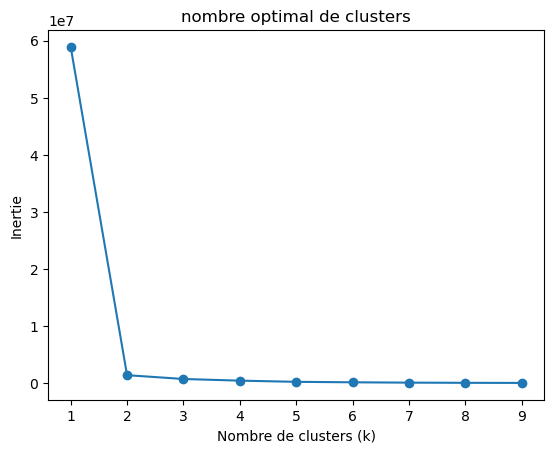

In [38]:
from sklearn.cluster import KMeans

X = df_opportunite_2[['Prix_au_m2']]
inertia = []
k_list = range(1, 10)
for k in k_list:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    
plt.plot(k_list, inertia, marker='o')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Inertie')
plt.title('nombre optimal de clusters')
plt.show()

On constate la cassure à partir de 2, le nombre de k optimale est donc bien 2.

In [39]:
kmeans = KMeans(n_clusters=2, n_init=10, random_state=0)
prediction_labellisation = kmeans.fit_predict(df_opportunite_2)

In [43]:
df_opportunite_2['prediction_label'] = prediction_labellisation

In [45]:
# On vérifie les données de la prédiction
df_opportunite_2

,Prix_au_m2,prediction_label
0,9871.444128,1
1,10045.572493,1
2,9194.697790,1
3,9469.142168,1
4,7463.610005,0
5,9982.016919,1
6,9674.262777,1
7,7348.917415,0
8,9789.051438,1
9,7616.420959,0


Nous avons obtenu notre prédiction. Nous pouvons changer les labels et remplacer les valeurs à +1 par Local industriel. commercial ou assimilé et les valeurs à 0 par Appartement. 

In [46]:
#On affiche les résultats
df_opportunite_2['prediction_label'] = df_opportunite_2['prediction_label'].replace({1: 'locaux', 0: 'appartements'})
print(df_opportunite_2)

      Prix_au_m2 prediction_label
0    9871.444128           locaux
1   10045.572493           locaux
2    9194.697790           locaux
3    9469.142168           locaux
4    7463.610005     appartements
5    9982.016919           locaux
6    9674.262777           locaux
7    7348.917415     appartements
8    9789.051438           locaux
9    7616.420959     appartements
10   7490.469041     appartements
11   9518.076103           locaux
12   7238.422973     appartements
13   9869.462342           locaux
14   7343.539315     appartements
15   7313.114384     appartements
16   7415.564351     appartements
17   9949.544452           locaux
18   9978.784822           locaux
19   7296.900510     appartements
20   7322.570548     appartements
21   7207.217630     appartements
22   9815.972258           locaux
23   7437.880186     appartements
24   7399.266027     appartements
25   7306.810274     appartements
26   9961.146860           locaux
27  10103.161577           locaux
28   9597.6314